In [21]:
import pandas as pd
import seaborn as sns
from IPython.display import HTML
from pandas import plotting
import matplotlib.pyplot as plt

In [3]:
# 楽曲特徴データ
df = pd.read_json('./files/target_playlist_track_features.json')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instrumentalness  100 non-null    float64
 1   mode              100 non-null    int64  
 2   energy            100 non-null    float64
 3   danceability      100 non-null    float64
 4   key               100 non-null    int64  
 5   type              100 non-null    object 
 6   uri               100 non-null    object 
 7   track_href        100 non-null    object 
 8   time_signature    100 non-null    int64  
 9   id                100 non-null    object 
 10  duration_ms       100 non-null    int64  
 11  analysis_url      100 non-null    object 
 12  liveness          100 non-null    float64
 13  loudness          100 non-null    float64
 14  valence           100 non-null    float64
 15  acousticness      100 non-null    float64
 16  speechiness       100 non-null    float64
 17

,instrumentalness,mode,energy,danceability,key,time_signature,duration_ms,liveness,loudness,valence,acousticness,speechiness,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.149760,0.560000,0.863740,0.610080,4.790000,3.980000,212678.700000,0.246176,-4.133490,0.385390,0.055181,0.088257,129.696600
std,0.284131,0.498888,0.104972,0.098479,3.679852,0.140705,61862.144132,0.173785,1.852916,0.205423,0.092751,0.071491,17.873948
min,0.000000,0.000000,0.480000,0.373000,0.000000,3.000000,126190.000000,0.034300,-11.734000,0.051100,0.000006,0.027500,81.009000
25%,0.000017,0.000000,0.815500,0.554500,1.000000,4.000000,172353.750000,0.096775,-4.859000,0.221000,0.003718,0.042625,126.011750
50%,0.000480,1.000000,0.889500,0.612000,4.500000,4.000000,196061.000000,0.206500,-4.030000,0.367500,0.015150,0.060750,128.017500
75%,0.098275,1.000000,0.941500,0.678500,8.000000,4.000000,227570.000000,0.379250,-3.133250,0.517250,0.071425,0.094325,129.972000
max,0.902000,1.000000,0.989000,0.886000,11.000000,4.000000,494860.000000,0.728000,0.234000,0.904000,0.520000,0.449000,195.056000


In [4]:
df_tracks = pd.read_json('./files/target_playlist_track.json')
df_tracks.info()
df_tracks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     100 non-null    object
 1   uri      100 non-null    object
 2   link     100 non-null    object
 3   artists  100 non-null    object
 4   id       100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


,name,uri,link,artists,id
count,100,100,100,100,100
unique,100,100,100,90,100
top,Magic (feat. Kyle Reynolds),spotify:track:4oLsOudIsf5p1yXVjqoOrc,https://open.spotify.com/track/4oLsOudIsf5p1yX...,"[{'name': 'Newclaess', 'uri': 'spotify:artist:...",4oLsOudIsf5p1yXVjqoOrc
freq,1,1,1,3,1


<AxesSubplot: >

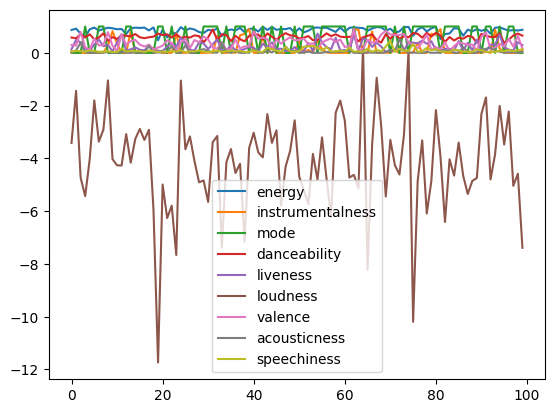

In [5]:
df_merge = pd.merge(df, df_tracks, on='uri')
df_merge.reindex(
    columns=['energy', 'instrumentalness', 'mode', 'danceability', 'liveness', 'loudness', 'valence', 'acousticness', 'speechiness']
).sum(numeric_only=True)

df_merge.reindex(
    columns=['energy', 'instrumentalness', 'mode', 'danceability', 'liveness', 'loudness', 'valence', 'acousticness', 'speechiness']
).plot()

In [6]:
# https://github.com/softhints/Pandas-Tutorials/blob/master/styling/create-clickable-link-pandas-dataframe-jupyterlab.ipynb
HTML(df_merge.sort_values('energy', ascending=False).reindex(columns=['name', 'energy', 'link']).to_html(render_links=True, escape=False))
HTML(df_merge.sort_values('energy', ascending=True).reindex(columns=['name', 'energy', 'link']).to_html(render_links=True, escape=False))

,name,energy,link
19,Loading,0.480,https://open.spotify.com/track/5NSETjJKhsCttEPQ59RSqM
81,Stampede - Original Mix,0.523,https://open.spotify.com/track/55LqAafhLoNmahQ9fkIOHY
21,Feel Alive,0.587,https://open.spotify.com/track/7F5fy8py8jbzCLxPfIt7dF
3,LA LA LAND (feat. Delaney Jane) - Breathe Carolina Remix Edit,0.600,https://open.spotify.com/track/79A5WcqhrMLPrJWDm8JiYQ
33,Firestone,0.634,https://open.spotify.com/track/3Hmo4GdZjoPsOPZzxsJF92
75,This Is A Test,0.648,https://open.spotify.com/track/60H6i1D6iReQ3VYiE52OwI
86,Make Me Move,0.650,https://open.spotify.com/track/5ZAUiOlYURVJEJ5ktV03v5
82,Wrong To Let You Go - VAANCE Remix,0.712,https://open.spotify.com/track/4Q6frXrbRhLF04fQ0OUQSe
12,No Crime,0.717,https://open.spotify.com/track/41mFDh95BcXwmay7wvrv9A
92,Hush,0.727,https://open.spotify.com/track/2rvpdbvSio3BsHCOnimivV


/var/folders/vv/ps2f1c3x6wd1hmw6wrtptw9c0000gn/T/ipykernel_83953/1118911527.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()


/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  func(*args, **kwargs)
/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.
  func(*args, **kwargs)
/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  func(*args, **kwargs)
/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/IPython/core/even

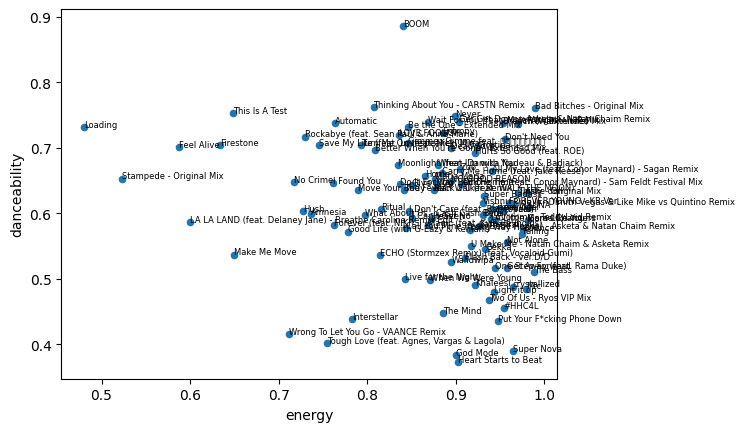

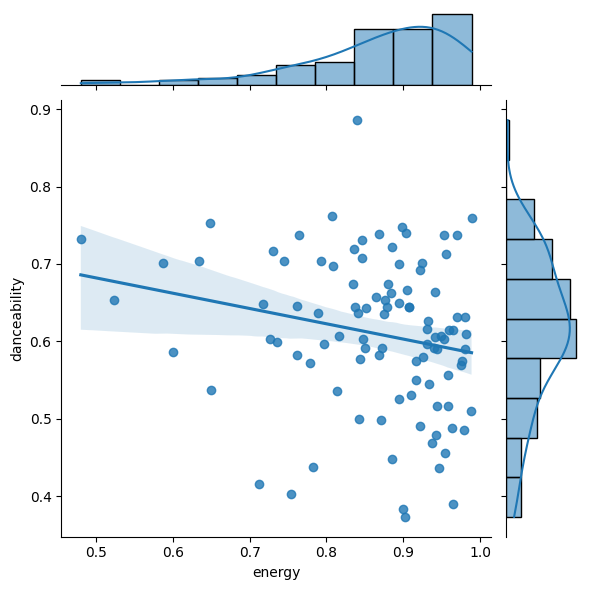

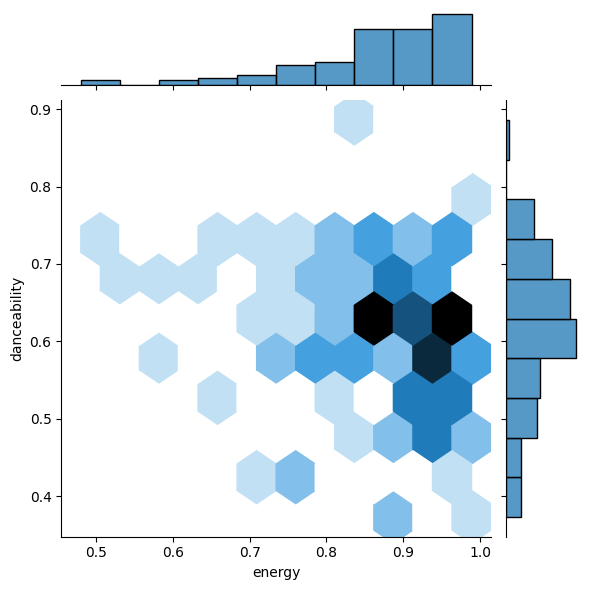

In [9]:
scatter = df_merge.reindex(columns=['name', 'energy', 'danceability']).plot.scatter(x='energy', y='danceability')
for k, v in df_merge.reindex(columns=['name', 'energy', 'danceability']).iterrows():
    scatter.annotate(v[0], xy=(v[1],v[2]), size=6)

df_merge.corr()
sns.jointplot(x='energy', y='danceability',data=df_merge, kind="reg")
sns.jointplot(x='energy', y='danceability',data=df_merge, kind="hex")

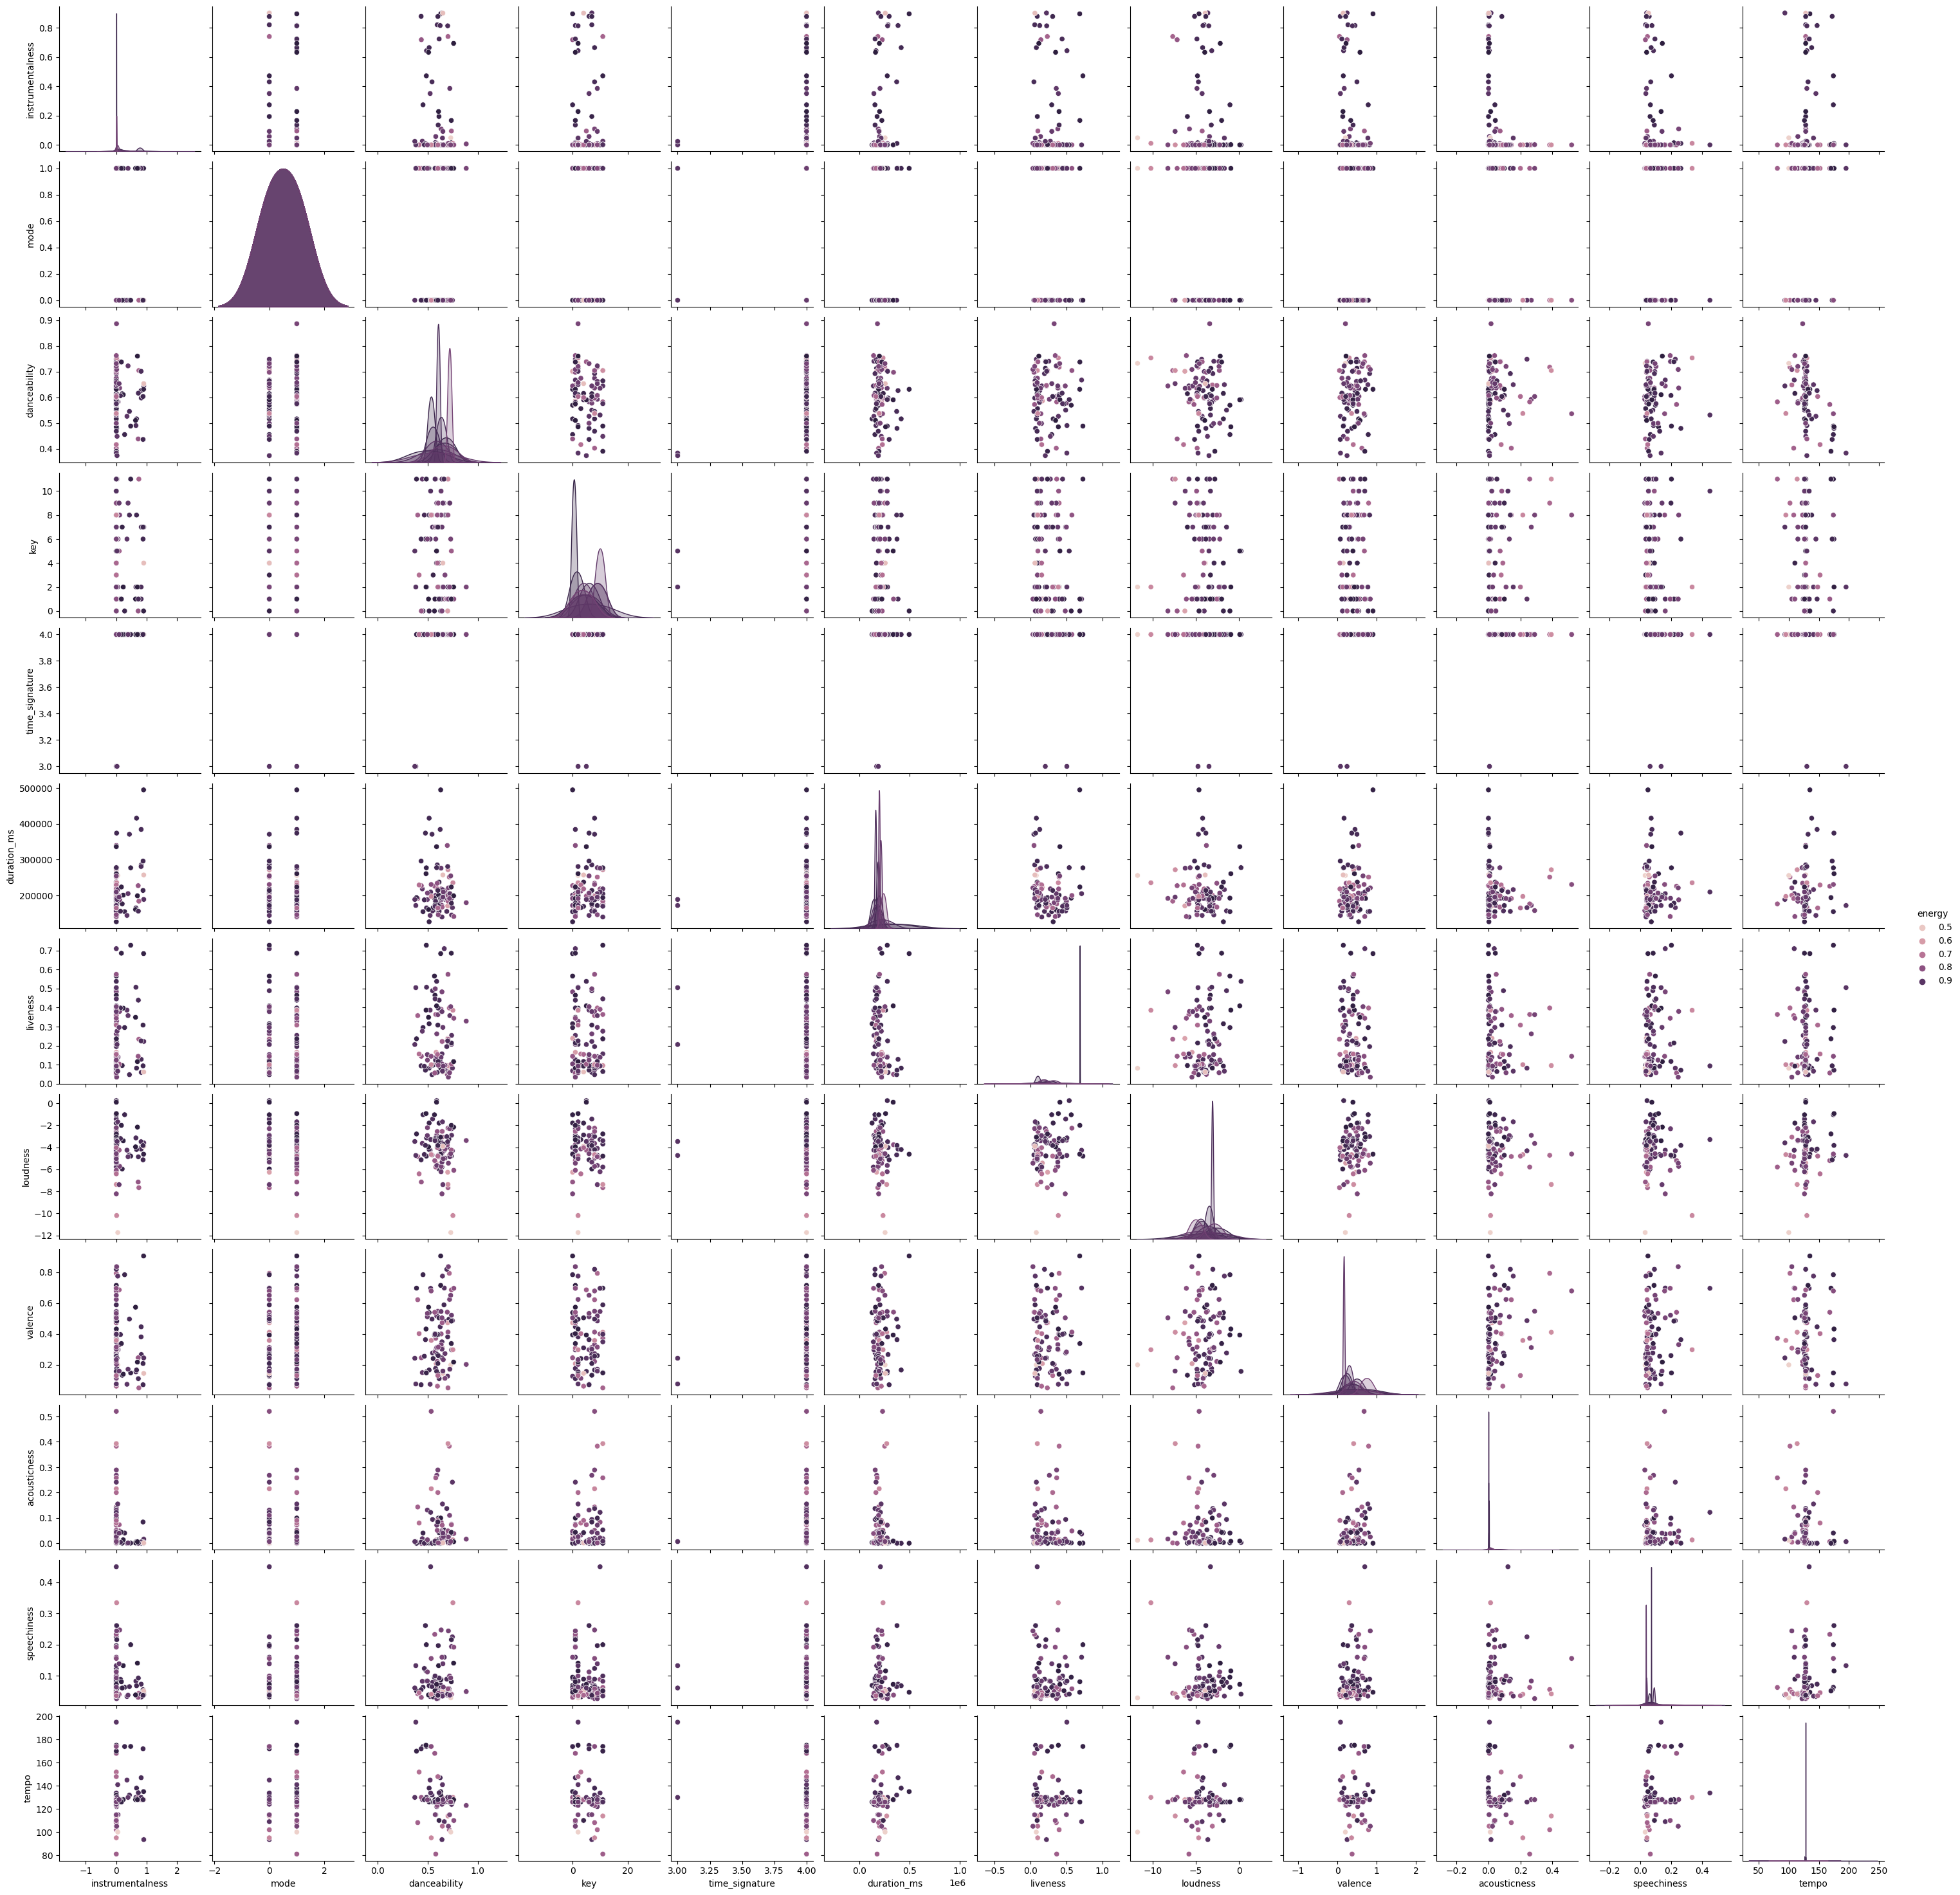

In [ ]:
sns.pairplot(df_merge, hue="energy")

In [ ]:
HTML(df_merge.loc[df_merge['name'] == 'Feel Alive'].to_html(render_links=True))

,instrumentalness,mode,energy,danceability,key,type,uri,track_href,time_signature,id_x,duration_ms,analysis_url,liveness,loudness,valence,acousticness,speechiness,tempo,name,link,artists,id_y
21,0.0026,0,0.587,0.701,0,audio_features,spotify:track:7F5fy8py8jbzCLxPfIt7dF,https://api.spotify.com/v1/tracks/7F5fy8py8jbzCLxPfIt7dF,4,7F5fy8py8jbzCLxPfIt7dF,170618,https://api.spotify.com/v1/audio-analysis/7F5fy8py8jbzCLxPfIt7dF,0.238,-6.262,0.472,0.0225,0.0378,127.966,Feel Alive,https://open.spotify.com/track/7F5fy8py8jbzCLxPfIt7dF,"[{'name': 'Jack & James', 'uri': 'spotify:artist:5wtxbzgYhdnCUNb3z4ulUA', 'id': '5wtxbzgYhdnCUNb3z4ulUA'}, {'name': 'Distrion', 'uri': 'spotify:artist:01amjyTlohCQrBLbM1scoO', 'id': '01amjyTlohCQrBLbM1scoO'}]",7F5fy8py8jbzCLxPfIt7dF


/Users/tozastation/.local/share/virtualenvs/analysis-EnZQIQ4k/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


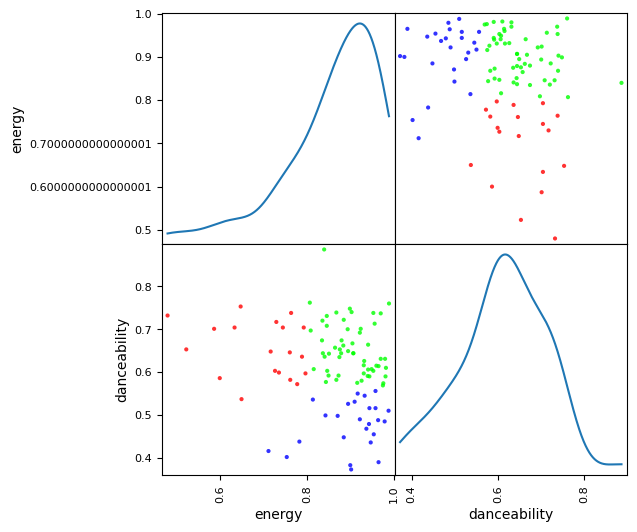

In [24]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3).fit(df_merge.reindex(columns=['energy', 'danceability']))
labels = kmeans_model.labels_
labels
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
colors = [color_codes[x] for x in labels]
plotting.scatter_matrix(df_merge.reindex(columns=['energy', 'danceability']), figsize=(6,6), color=colors, alpha=0.8, diagonal='kde') 
plt.show()

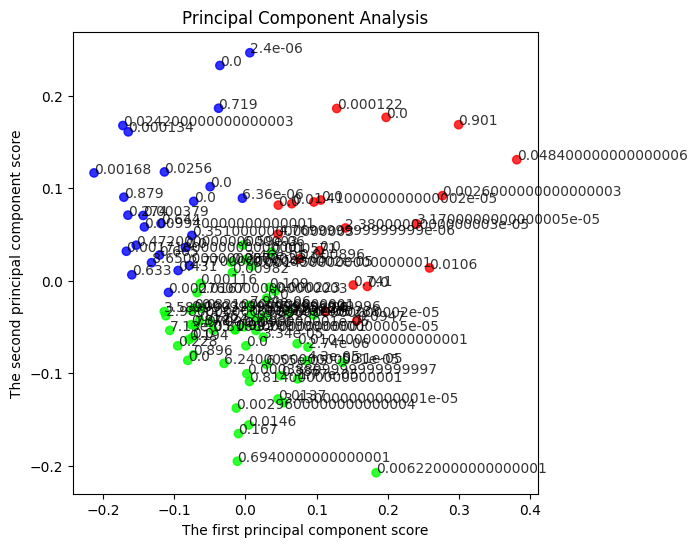

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_merge.reindex(columns=['energy', 'danceability']))
feature = pca.transform(df_merge.reindex(columns=['energy', 'danceability']))
plt.figure(figsize=(6, 6))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.iloc[:, 0]):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()
